In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Train data shape: {x_train.shape}, Test data shape: {x_test.shape}")

Train data shape: (60000, 28, 28), Test data shape: (10000, 28, 28)


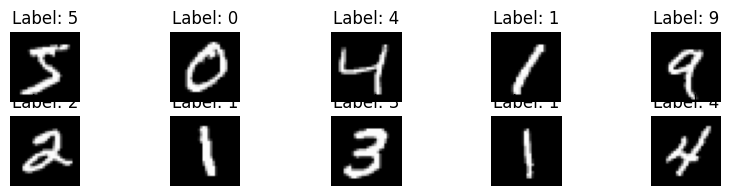

In [22]:
import matplotlib.pyplot as plt

# Hiển thị 10 ảnh đầu tiên trong tập dữ liệu
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Label: {y_train[i]}")
plt.show()

# Chuẩn hóa dữ liệu

In [23]:
# Chuyển giá trị pixel từ [0, 255] về [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape dữ liệu cho CNN
Mô hình CNN cần đầu vào có định dạng (số ảnh, chiều cao, chiều rộng, số kênh màu):

In [24]:
# Thêm kênh màu (1 kênh vì ảnh grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Xây dựng mô hình CNN

In [25]:
from tensorflow.keras import layers, models

# Xây dựng mô hình CNN
model = models.Sequential()

# Thêm lớp Conv2D + MaxPooling2D
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Conv2D + MaxPooling2D
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Conv2D + MaxPooling2D
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Chuyển đổi đầu ra thành một vector 1 chiều
model.add(layers.Flatten())

# Thêm lớp Dense
model.add(layers.Dense(64, activation='relu'))

# Lớp đầu ra với 10 neuron (tương ứng 10 chữ số)
model.add(layers.Dense(10, activation='softmax'))

# Xem tóm tắt mô hình
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# Biên dịch mô hình

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình

In [27]:
# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8936 - loss: 0.3379 - val_accuracy: 0.9800 - val_loss: 0.0627
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9849 - loss: 0.0464 - val_accuracy: 0.9885 - val_loss: 0.0355
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9900 - loss: 0.0318 - val_accuracy: 0.9894 - val_loss: 0.0328
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9891 - val_loss: 0.0325
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9946 - loss: 0.0176 - val_accuracy: 0.9906 - val_loss: 0.0343


# Đánh giá mô hình

In [28]:
# Đánh giá mô hình trên tập test
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0462
Test accuracy: 0.9905999898910522


In [29]:
# Sau khi huấn luyện xong mô hình (ví dụ với MNIST)
model.save('minist_model.h5')

Ảnh gốc:


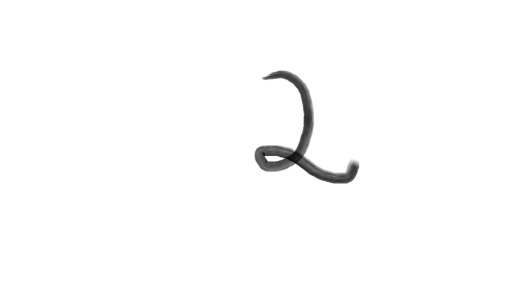

Ảnh sau khi thresholding:


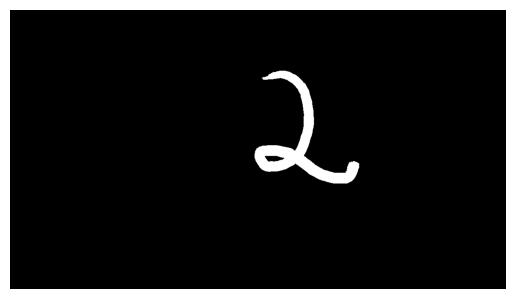

Ảnh sau khi resize về 28x28:


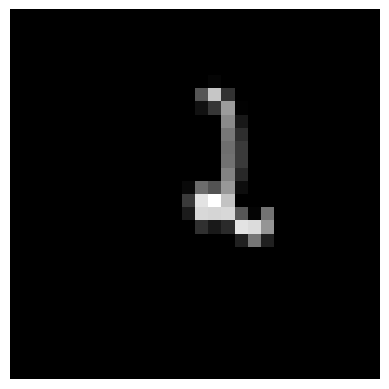

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Softmax: [0.017 0.208 0.253 0.2   0.123 0.017 0.009 0.154 0.012 0.006]
Dự đoán: 2


In [76]:
from PIL import Image, ImageEnhance, ImageFilter
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Đảm bảo mô hình đã được tải
model = tf.keras.models.load_model('minist_model.h5')

# Đọc và xử lý ảnh '9.png'
image_path = '6.png'
image = Image.open(image_path)

# Chuyển ảnh về grayscale (đen trắng)
image = image.convert('L')

# In ảnh gốc
print("Ảnh gốc:")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Tạo ngưỡng để chuyển ảnh thành đen và trắng rõ ràng hơn (thresholding)
threshold_value = 200  # Giá trị ngưỡng tùy chỉnh (có thể thay đổi)
image = image.point(lambda p: 200 if p < threshold_value else 0)

# In ảnh sau khi đã thực hiện thresholding
print("Ảnh sau khi thresholding:")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Resize ảnh về kích thước 28x28 nếu cần thiết
image_resized = image.resize((28, 28))

# In ảnh sau khi resize
print("Ảnh sau khi resize về 28x28:")
plt.imshow(image_resized, cmap='gray')
plt.axis('off')
plt.show()

# Chuyển ảnh thành mảng numpy và chuẩn hóa giá trị pixel về [0, 1]
img_array = np.array(image_resized) / 255.0

# Reshape ảnh cho phù hợp với đầu vào của mô hình (1, 28, 28, 1)
img_array = img_array.reshape(1, 28, 28, 1)

# Dự đoán với mô hình
prediction = model.predict(img_array)
predicted_class = int(np.argmax(prediction))

# In ra kết quả
print(f"Softmax: {np.round(prediction[0], 3)}")
print(f"Dự đoán: {predicted_class}")